# Are developers passinate about new programming language or framework? 
## <center>------   *Stack Overflow Developer Survey 2020 data analysis*   ----- </center>



## Business Understanding
 Innovation is becoming more and more popular topic in IT and for developers. According to (Dominique Boucher 2017), in his article "Programming languages and innovation", "It is always worthwhile to learn other programming paradigms and languages". 
 
 This is an exploratory work on data analysis of 2020 Stack Overflow Developer Survey, the largest and most comprehensive survey of software developers (and anyone else who codes!) on Earth, covering all sorts of information like programming languages, jobs, code style and more.
 
 There are six sections in the survey. In 2020, compared to 2019, new question, "How frequently do you learn a new language or framework?"  listed in the first place in section "Technology and Tech Culture".Data analysis and machine learning (Logistic regression, Adaboost classifications) are untilized to get some insight into the survey data.


## Data Understanding
Response from 47,487 respondent , who have jobs ("Employed full-time", "Employed part-time", "Independent contractor", "freelancer, or self-employed",  ) are being used for analysis.  Amony them, 2% of the respondent, chose they learn new language or framework  'Once a decade', 22.4% 'Once every few years', 33.7% 'Once a year'. The remaining 30.1%, who chose 'Every few months', are the group of developers who are most passinate about learning new language or frameworks.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

df_raw = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [4]:
df_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df_raw.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [6]:
df_raw.isna().sum().sort_values()

Respondent                    0
Hobbyist                     45
MainBranch                  299
Country                     389
Employment                  607
                          ...  
WebframeDesireNextYear    24437
PurchaseWhat              25097
NEWPurchaseResearch       27140
CompTotal                 29635
ConvertedComp             29705
Length: 61, dtype: int64

## Prepare Data
These fields in the survey are being used

1. ConvertedComp - Salary in USD
2. Country - Country of the responder
3. EdLevel - Education Level
4. Employment - Employment Status
5. Gender - Gender of the responder
6. JobSat - Job Satisfaction
7. NEWEdImpt - Eduction Importance Perceived
8. NEWLearn - Innovation: Frequency of learn new language or framework
9. NEWOvertime - Work Overtime
10. OrgSize - Organization Size


In [8]:
# Analyse developer who has job
df_pre = df_raw[df_raw['Employment'].isin(
    ["Employed full-time", "Independent contractor", "freelancer, or self-employed", "Employed part-time"])]

column_list = ['NEWLearn','Age', 'Country', 'EdLevel', 'Gender', 'ConvertedComp', 'JobSat', 'NEWEdImpt', 'NEWOvertime',
               'OrgSize']

column_name = ({'NEWLearn': 'Learn New Frequency',
                'Age': 'Age of Developer',
                'Country': 'Country of Developer ',
                'EdLevel': 'Education Level',
                'Gender': 'Developer Gender',
                'ConvertedComp': 'Salary',
                'JobSat': 'Job Satisfaction',
                'NEWEdImpt': 'Education Importance',
                'NEWOvertime': 'Overtime Frequency',
                'OrgSize': 'Organization Size'
                })

df_pre.shape

(47487, 61)

In [9]:
df_pre.groupby(['NEWLearn'])['NEWLearn'].count()

NEWLearn
Every few months        14283
Once a decade             914
Once a year             15985
Once every few years    10618
Name: NEWLearn, dtype: int64

In [10]:
df_pre.groupby(['NEWLearn'])['Age'].mean()

NEWLearn
Every few months        29.443402
Once a decade           38.858939
Once a year             31.213933
Once every few years    34.812477
Name: Age, dtype: float64

In [59]:
df_pre.groupby(['Country'])['Age'].mean().sort_values()

Country
Belize               20.000000
Brunei Darussalam    22.000000
Niger                24.000000
Bhutan               24.000000
Afghanistan          24.076923
                       ...    
Mali                       NaN
Mauritania                 NaN
North Korea                NaN
Tajikistan                 NaN
Timor-Leste                NaN
Name: Age, Length: 176, dtype: float64

In [11]:
df_pre.groupby(['Country'])['Country'].count()

Country
Afghanistan                              43
Albania                                  38
Algeria                                  42
Andorra                                   8
Angola                                    4
                                       ... 
Venezuela, Bolivarian Republic of...     39
Viet Nam                                218
Yemen                                     5
Zambia                                   11
Zimbabwe                                 16
Name: Country, Length: 176, dtype: int64

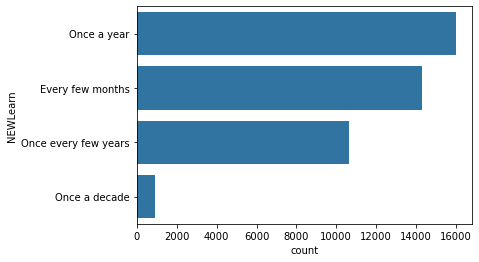

In [12]:
sns.countplot(data=df_pre, y='NEWLearn', color=sns.color_palette()[0]);

In [14]:
# Data conversion
# NEWLearn - Innovation Passionate: Frequency of learn new language or framework
df_pre = df_pre.replace({'NEWLearn': {'Every few months': 4,
                                      'Once a year': 3,
                                      'Once every few years': 2,
                                      'Once a decade': 1}})

# JobSat - Job Satisfaction
df_pre = df_pre.replace({'JobSat': {'Very dissatisfied': 1,
                                    'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3,
                                    'Slightly satisfied': 4,
                                    'Very satisfied': 5}})

# EdLevel - Education Level
df_pre = df_pre.replace({'EdLevel': {'I never completed any formal education': 1,
                                     'Primary/elementary school': 2,
                                     'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 3,
                                     'Some college/university study without earning a degree': 4,
                                     'Associate degree (A.A., A.S., etc.)': 5,
                                     'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 6,
                                     'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 7,
                                     'Professional degree (JD, MD, etc.)': 8,
                                     'Other doctoral degree (Ph.D., Ed.D., etc.)': 9}})

# Gender,only study Man and Woman
df_pre = df_pre.replace({'Gender': {'Non-binary, genderqueer, or gender non-conforming': np.nan,
                                    'Man;Non-binary, genderqueer, or gender non-conforming': np.nan,
                                    'Woman;Non-binary, genderqueer, or gender non-conforming': np.nan,
                                    'Woman;Man': np.nan,
                                    'Woman;Man;Non-binary, genderqueer, or gender non-conforming': np.nan}})

# NEWEdImpt - Eduction Importance Perceived
df_pre = df_pre.replace({'NEWEdImpt': {'Not at all important/not necessary': 1,
                                       'Somewhat important': 2,
                                       'Fairly important': 3,
                                       'Very important': 4,
                                       'Critically important': 5}})

# NEWOvertime - Work Overtime
df_pre = df_pre.replace({'NEWOvertime': {'Never': 0,
                                         'Rarely: 1-2 days per year or less': 1,
                                         'Occasionally: 1-2 days per quarter but less than monthly': 2,
                                         'Sometimes: 1-2 days per month but less than weekly': 3,
                                         'Often: 1-2 days per week or more': 4}})

# OrgSize - Organization Size
df_pre = df_pre.replace({'OrgSize': {'Just me - I am a freelancer, sole proprietor, etc.': 0,
                                     '2 to 9 employees': 1,
                                     '10 to 19 employees': 2,
                                     '20 to 99 employees': 3,
                                     '100 to 499 employees': 4,
                                     '500 to 999 employees': 5,
                                     '1,000 to 4,999 employees': 6,
                                     '5,000 to 9,999 employees': 7,
                                     '10,000 or more employees': 8,
                                     "I don't know": np.nan}})


In [15]:
def plotCompare(subset):
    '''
    INPUT
    subset - pandas dataframe
   
    This function plot various diagrams for Learn New Language and Framework
   '''
    df_pc = df_pre.dropna(axis=0, subset=[subset])

    if subset == 'Country':
        df_pc = df_pre.dropna(axis=0, subset=['Country'])
        count = df_pc['Country'].value_counts()
        count = count[count >= 200] # Select countries who have respondent more than 200
        keep = list(count.index)
        df_pc = df_pc[df_pc['Country'].isin(keep)]

    df_pc_plt = df_pc.groupby([subset])['NEWLearn'].mean().sort_values(ascending=False)

    if subset == 'Country':
        print(df_pc_plt.head)
        plt.figure(figsize=[10, 25])
        fig = sns.barplot(y=df_pc_plt.index, x=df_pc_plt, color=sns.color_palette()[0])
        fig.set(xlabel=column_name['NEWLearn'], ylabel=column_name[subset])

    elif subset in ('ConvertedComp', 'JobSat','Age'):
        #     elif subset in ('ConvertedComp'):

        df_pc_plt = df_pc.groupby(['NEWLearn'])[subset].mean().sort_values(ascending=False)
        print(df_pc_plt.head)
        plt.figure(figsize=[7, 4])
        fig = sns.barplot(y=df_pc_plt, x=df_pc_plt.index, color=sns.color_palette()[0])
        fig.set(xlabel=column_name['NEWLearn'], ylabel=column_name[subset])

    elif subset == 'Gender':
        print(df_pc_plt.head)
        plt.figure(figsize=[7, 2])
        fig = sns.barplot(y=df_pc_plt.index, x=df_pc_plt, color=sns.color_palette()[0])
        fig.set(xlabel=column_name['NEWLearn'], ylabel=column_name[subset])

    else:
        plt.figure(figsize=[7, 4])
        print(df_pc_plt.head)
        fig = sns.barplot(y=df_pc_plt, x=df_pc_plt.index, color=sns.color_palette()[0])
        fig.set(xlabel=column_name[subset], ylabel=column_name['NEWLearn'])

    plt.title("Learn New Frequency vs. %s" % column_name[subset]);

<bound method NDFrame.head of NEWLearn
1.0    38.858939
2.0    34.812477
3.0    31.213933
4.0    29.443402
Name: Age, dtype: float64>


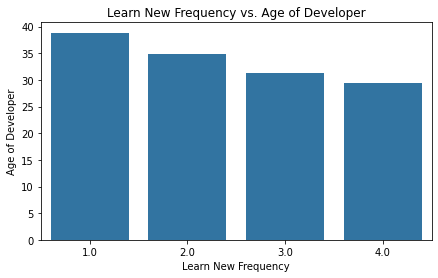

In [16]:
plotCompare('Age')

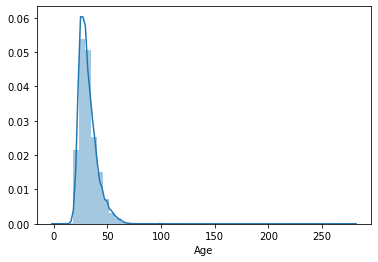

In [17]:
sns.distplot(df_pre['Age'])

<bound method NDFrame.head of Gender
Man      3.031614
Woman    3.000358
Name: NEWLearn, dtype: float64>


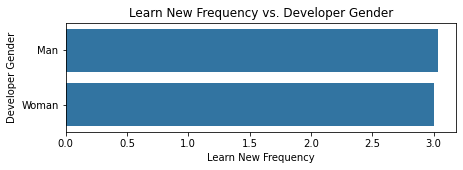

In [18]:
plotCompare('Gender')

<bound method NDFrame.head of EdLevel
2.0    3.217647
1.0    3.126638
3.0    3.126374
4.0    3.109895
6.0    3.072821
5.0    3.040689
8.0    2.996409
7.0    2.958102
9.0    2.677612
Name: NEWLearn, dtype: float64>


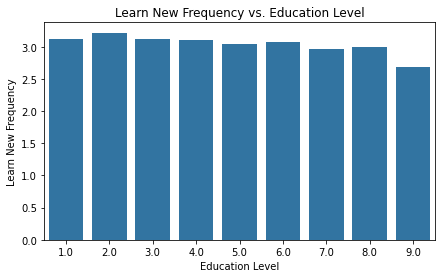

In [19]:
plotCompare('EdLevel')

<bound method NDFrame.head of NEWLearn
2.0    115450.933468
3.0    110006.234167
1.0    109799.512438
4.0     91463.250831
Name: ConvertedComp, dtype: float64>


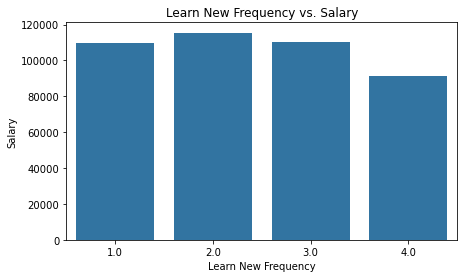

In [39]:
plotCompare('ConvertedComp')

<bound method NDFrame.head of Country
Pakistan              3.460241
Sri Lanka             3.435583
Bangladesh            3.404682
Iran                  3.320261
India                 3.315312
Indonesia             3.280374
Nigeria               3.279330
Argentina             3.264706
Philippines           3.258065
Viet Nam              3.257669
China                 3.245033
Brazil                3.221440
Colombia              3.214286
Mexico                3.165698
Israel                3.120729
Japan                 3.109589
South Africa          3.097179
Poland                3.047809
Portugal              3.022059
Turkey                3.016667
Germany               2.992350
Austria               2.991758
Canada                2.984512
Australia             2.982599
Ireland               2.972561
Spain                 2.966864
Switzerland           2.962389
Bulgaria              2.955947
United States         2.951114
Greece                2.942149
Finland               2.939163
F

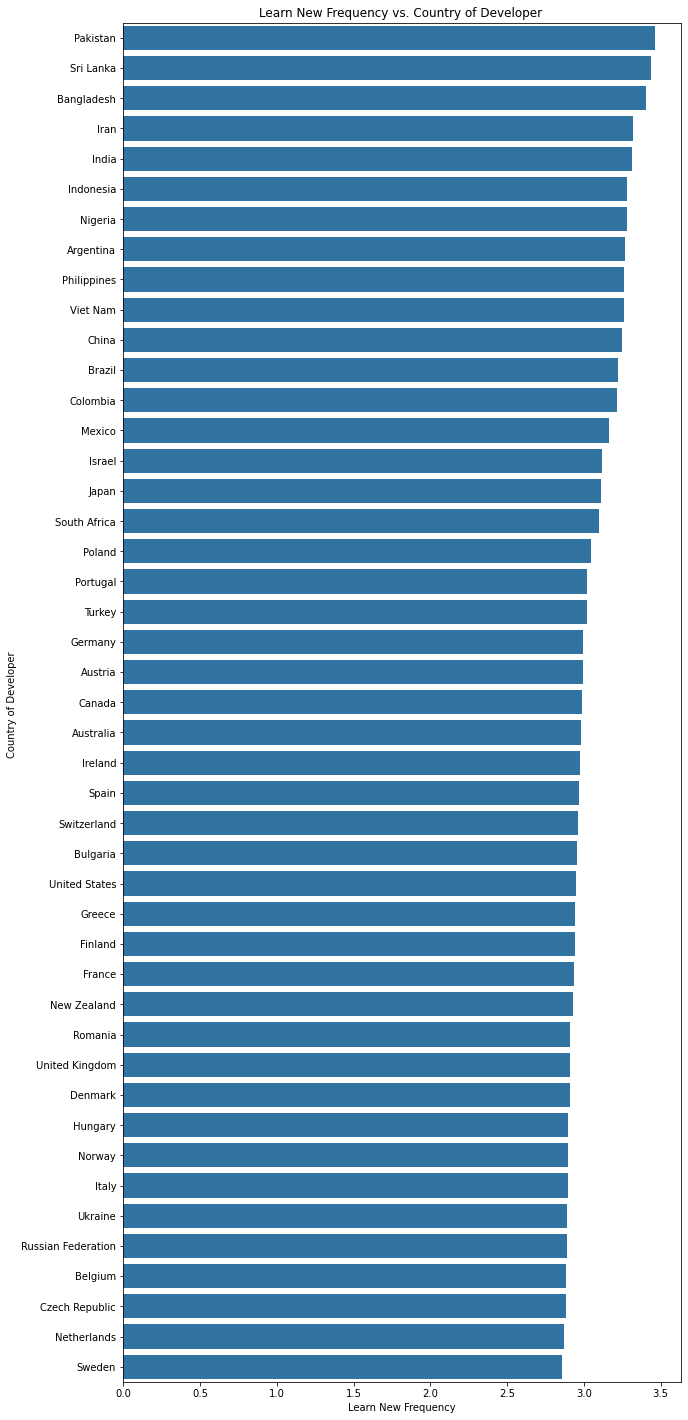

In [20]:
plotCompare('Country')

<bound method NDFrame.head of NEWOvertime
4.0    3.097663
3.0    3.042012
0.0    3.027238
2.0    2.999637
1.0    2.970511
Name: NEWLearn, dtype: float64>


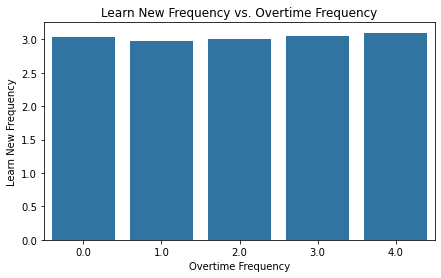

In [21]:
plotCompare('NEWOvertime')

<bound method NDFrame.head of OrgSize
0.0    3.201439
1.0    3.122272
2.0    3.118085
3.0    3.058264
8.0    3.023703
4.0    3.016192
5.0    2.994588
6.0    2.968042
7.0    2.949037
Name: NEWLearn, dtype: float64>


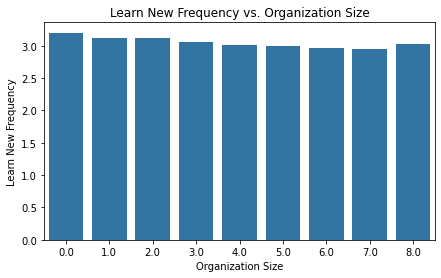

In [22]:
plotCompare('OrgSize')

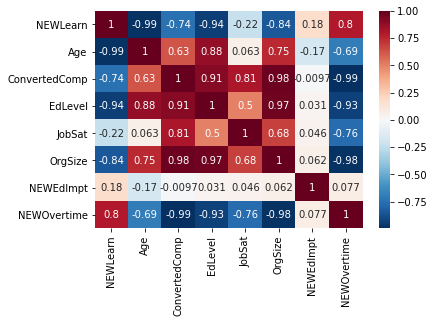

In [74]:
df_corr = df_pre.groupby(['NEWLearn'])[['NEWLearn','Age','ConvertedComp','EdLevel', 'JobSat','OrgSize','NEWEdImpt','NEWOvertime']].mean()
sns.heatmap(df_corr.corr(),annot=True,linecolor="grey",cmap="RdBu_r")

## Model data and evaluate results


In [38]:
df_raw.shape

(64461, 61)

In [39]:
def sel_data(df):
    '''
    INPUT
    df - pandas dataframe
    
    OUTPUT
    df - pandas dataframe, return selected data
   
    This function select part of the developers, classify into two groups and numerize to 1 and 0, 1 is for frequent learner or 
    innovation preference  
   '''
    # drop Respondent number, Compansation Frequency, Compansation Total, and keep Converted Compansation for model
    df = df.drop(['Respondent', 'CompFreq', 'CompTotal'], axis=1)
    
    # select developers who is at work
    df = df.loc[df['Employment'].isin(
        ["Employed full-time", "Independent contractor", "freelancer, or self-employed", "Employed part-time"])]
    
    # drop respondent with coding experience 'Less than 1 year' and 'More than 50 years',YearsCode: Years have been coding including eduction,
    # YearsCodePro: Years have been coding excluding eduction
    df = df[~df.YearsCode.isin(['More than 50 years', 'Less than 1 year'])]
    df = df[~df.YearsCodePro.isin(['More than 50 years', 'Less than 1 year'])]

    # drop null value rows and select part of the respondent to reduce outlier
    df = df.dropna(subset=(['NEWLearn', 'ConvertedComp', 'YearsCode', 'YearsCodePro']), axis=0)
    df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]
    df = df[(df['ConvertedComp'] >= 1200) & (df['ConvertedComp'] < 1000000)]
    df = df[(df['WorkWeekHrs'] >= 20) & (df['WorkWeekHrs'] <= 72)]
    
    # classify the developer, who Learn language or framework Every few months as innovation preference       
    df = df.replace({'NEWLearn': {'Every few months': 1,
                                  'Once a year': 0,
                                  'Once every few years': 0,
                                  'Once a decade': 0, }})   
    
    # numerize experience of years of coding
    df['YearsCode'] = pd.to_numeric(df['YearsCode'])
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])
    df = df[(df['YearsCode'] >= 2) & (df['YearsCodePro'] >= 2)]

    return df

In [40]:
# select data for predit model 
df_cl = sel_data(df_raw)

In [41]:
df_cl.shape

(22404, 58)

In [26]:
df_cl.groupby(['NEWLearn'])['NEWLearn'].count()

NEWLearn
0    15770
1     6634
Name: NEWLearn, dtype: int64

In [27]:
df_cl.groupby(['Country'])['Country'].count()

Country
Afghanistan                               5
Albania                                  17
Algeria                                   9
Angola                                    1
Argentina                               127
                                       ... 
Venezuela, Bolivarian Republic of...     16
Viet Nam                                 49
Yemen                                     1
Zambia                                    1
Zimbabwe                                  3
Name: Country, Length: 144, dtype: int64

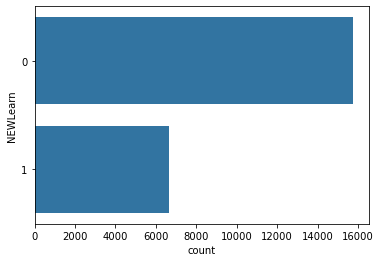

In [28]:
sns.countplot(data=df_cl, y='NEWLearn', color=sns.color_palette()[0]);

In [42]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
   '''
  
    y = df['NEWLearn']
    X = df.drop(['NEWLearn'], axis=1)
    
    # Normalize numerical fields, and null value imputation
    num_vars = df.select_dtypes(include=['int', 'float']).columns

    for col in num_vars:
        X[col] = X[col] / (X[col].max() - X[col].min())
        X[col].fillna(X[col].mean(), inplace=True)

    # Object fields one-hot encoding
    cat_df = X.select_dtypes(include=['object']).copy()
    cat_vars = cat_df.columns

    for var in cat_vars:
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep="_")], axis=1)

    return X, y


In [43]:
# Prepare the data for classification model
X, y = clean_data(df_cl)

In [44]:
def find_optimal_mod(cl_model, X, y, cutoffs, test_size=.30, random_state=42, plot=True):
    '''
    INPUT
    cl_model - classification model to be used
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, controls random state for train_test_split
    plot - boolean, True to plot result

    OUTPUT
    scores_test - list of floats of accuracy scores on the test data
    scores_train - list of floats of accuracy scores on the train data
    cl_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    scores_test, scores_train, num_feats, results = [], [], [], dict()

    for cutoff in cutoffs:
        # reduce X matrix, cutoff is the minimum missing values in the column, the higher the cutoff, the less feastures in the dataset,
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        # split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size=test_size, random_state=random_state)

        # fit the model and obtain pred response
        model = cl_model
        model.fit(X_train, y_train)
        y_train_preds = model.predict(X_train)
        y_test_preds = model.predict(X_test)

        # append the ccuracy_score from the test set
        scores_train.append(accuracy_score(y_train, y_train_preds))
        scores_test.append(accuracy_score(y_test, y_test_preds))
        results[str(cutoff)] = accuracy_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Accuracy')
        plt.title('Accuracy by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    # reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size=test_size, random_state=random_state)

    model.fit(X_train, y_train)
#     joblib.dump(model, 'save/clf_model.pkl') # Save the model

    return scores_test, scores_train, model, X_train, X_test, y_train, y_test


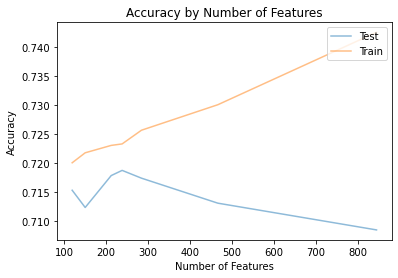

In [45]:
clf_model = LogisticRegression(max_iter=1000)

# uncomment to pass cutoffs to select fields for best model
cutoffs = [1500,1000,600,500,400,200,100]

# best custoff
# cutoffs = [500]

# pass classification model,X and y to the model for model selection and testing
scores_test, scores_train, model, X_train, X_test, y_train, y_test = find_optimal_mod(clf_model, X, y, cutoffs)


In [46]:
# Accuracy scores
print("Features best model: {} ".format(X_train.shape[1])) 
print("Train accuracy: {} ".format(scores_train[np.argmax(scores_train)]))
print("Test accuracy: {} ".format(scores_test[np.argmax(scores_test)]))

Features best model: 238 
Train accuracy: 0.7425073332483102 
Test accuracy: 0.7186849152038084 


In [47]:
coefficients = pd.concat([pd.DataFrame({'Feature': X_train.columns}),
                          pd.DataFrame(np.transpose(model.coef_))], axis=1)
coefficients.rename(columns={0: 'Coeficient'}, inplace=True)
coefficients.sort_values(by=['Coeficient'], ascending=False).head(20)

,Feature,Coeficient
22,Country_Brazil,0.683357
215,SOVisitFreq_Multiple times per day,0.548005
108,NEWDevOpsImpt_Extremely important,0.498106
139,NEWOnboardGood_Yes,0.474300
138,NEWOnboardGood_Onboarding? What onboarding?,0.433722
144,NEWOvertime_Often: 1-2 days per week or more,0.418981
40,CurrencySymbol_CAD,0.414955
33,CurrencyDesc_Canadian dollar,0.414955
137,NEWOnboardGood_No,0.403266
214,SOVisitFreq_Daily or almost daily,0.349303


In [ ]:
# compare

In [12]:
# Comparatively, AdaBoostClassifier is used to check if accuracy can be improved

# build a classifier for ada boost
cl_mode = AdaBoostClassifier()

# reduce X matrix, cutoff is the minimum missing values in the column, the higher the cutoff, the less feastures in the dataset,
# M01 np.whare?
reduce_X = X.iloc[:, np.where((X.sum() > 500) == True)[0]]
# num_feats.append(reduce_X.shape[1])

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size=0.3, random_state=42)

# set up the hyperparameter search
param_dist = {"n_estimators": [10, 100, 200],
              "learning_rate": [0.2, 0.5, 1, 2]}

# uncomment to use best estimators
# param_dist = {"n_estimators": [200],
#                "learning_rate": [0.5]}

# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(cl_mode, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

print('Accuracy score: ', format(accuracy_score(y_test, ada_preds)))
print('Precision_score: ', format(precision_score(y_test, ada_preds)))
print('Recall_score: ', format(recall_score(y_test, ada_preds)))
print('F1_score score: ', format(f1_score(y_test, ada_preds)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Accuracy score:  0.7180898542100566
Precision_score:  0.5585106382978723
Recall_score:  0.2118003025718608
F1_score score:  0.3071297989031079


## Evaluate the Results